In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Crimes_-_2001_to_Present_20250426.csv")
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13809083,JJ222182,04/17/2025 12:00:00 AM,007XX W JACKSON BLVD,0760,BURGLARY,BURGLARY FROM MOTOR VEHICLE,STREET,False,False,...,34.0,28.0,06,1171812.0,1898879.0,2025,04/24/2025 03:41:55 PM,41.877982,-87.644608,"(41.877981539, -87.644608125)"
1,13809110,JJ222172,04/17/2025 12:00:00 AM,0000X W 79TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,CTA PLATFORM,True,False,...,6.0,44.0,15,1177483.0,1852629.0,2025,04/24/2025 03:41:55 PM,41.750941,-87.625185,"(41.750940757, -87.625185222)"
2,13812626,JJ226018,04/17/2025 12:00:00 AM,0000X W 69TH ST,0820,THEFT,$500 AND UNDER,CTA TRAIN,False,False,...,6.0,69.0,06,1177279.0,1859276.0,2025,04/24/2025 03:41:55 PM,41.769185,-87.625732,"(41.769185486, -87.625732415)"
3,13809044,JJ222168,04/17/2025 12:00:00 AM,0000X E OHIO ST,0870,THEFT,POCKET-PICKING,RESTAURANT,False,False,...,42.0,8.0,06,1176817.0,1904214.0,2025,04/24/2025 03:41:55 PM,41.892509,-87.626070,"(41.892509386, -87.626069718)"
4,13808210,JJ221075,04/16/2025 11:56:00 PM,015XX N KEELER AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,ALLEY,False,False,...,36.0,23.0,15,1148097.0,1910012.0,2025,04/24/2025 03:41:55 PM,41.909021,-87.731398,"(41.90902089, -87.731397544)"


In [ ]:
data.shape

(1033628, 22)

In [ ]:
data.info()  # Get additional information about the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13088 entries, 0 to 13087
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13088 non-null  int64  
 1   Case Number           13088 non-null  object 
 2   Date                  13088 non-null  object 
 3   Block                 13088 non-null  object 
 4   IUCR                  13087 non-null  object 
 5   Primary Type          13087 non-null  object 
 6   Description           13087 non-null  object 
 7   Location Description  13047 non-null  object 
 8   Arrest                13087 non-null  object 
 9   Domestic              13087 non-null  object 
 10  Beat                  13087 non-null  float64
 11  District              13087 non-null  float64
 12  Ward                  13087 non-null  float64
 13  Community Area        13087 non-null  float64
 14  FBI Code              13087 non-null  object 
 15  X Coordinate       

In [ ]:
data.isnull().sum() # Get the number of null values in each column.

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,1
Primary Type,1
Description,1
Location Description,41
Arrest,1
Domestic,1


In [ ]:
data.describe() # Get statistical information about dataset.

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.308800e+04,13087.000000,13087.000000,13087.000000,13087.000000,1.302600e+04,1.302600e+04,13087.0,13026.000000,13026.000000
mean,1.378610e+07,1159.274547,11.362039,23.408573,36.541071,1.165523e+06,1.887073e+06,2025.0,41.845705,-87.668078
std,4.168299e+05,708.882608,7.085516,13.934533,21.743235,1.633653e+04,3.175161e+04,0.0,0.087313,0.059483
min,2.865200e+04,111.000000,1.000000,1.000000,1.000000,1.093568e+06,1.814146e+06,2025.0,41.644782,-87.931147
25%,1.379323e+07,533.000000,5.000000,10.000000,22.000000,1.154094e+06,1.859776e+06,2025.0,41.770598,-87.709476
50%,1.379879e+07,1033.000000,10.000000,23.000000,32.000000,1.167158e+06,1.893546e+06,2025.0,41.863558,-87.661719
75%,1.380408e+07,1811.000000,18.000000,35.000000,54.000000,1.176708e+06,1.910176e+06,2025.0,41.909426,-87.627113
max,1.381534e+07,2535.000000,31.000000,50.000000,77.000000,1.205117e+06,1.951493e+06,2025.0,42.022536,-87.524532


Primary questions

Total Number of cases ?
Cases registered each day ?
Most appeared Block/Address ?
What are the top 10 primary types ?
Most Appeared location description ?
Get location using lat and long .

In [ ]:
# Number of Unique Case Number.

print(f"Out of {len(data)}: {len(data['Case Number'].unique())} are unique case numbers")

Out of 13088: 13088 are unique case numbers


##### Most case numbers are unique case numbers.

In [ ]:
# Out of all cases , how many are non_unique cases ?

non_unique_case_number = data[data.duplicated('Case Number') | data.duplicated('Case Number', keep=False)]['Case Number'].tolist()

print(f"Length of non_unique: {len(non_unique_case_number)} out of {len(data)}")

Length of non_unique: 0 out of 13088


In [ ]:
non_unique_case_number_df = data[data.duplicated('Case Number', keep=False)]
non_unique_case_number_df.head() # Saving non_unique case number dataframe for future use.

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [ ]:
non_unique_case_number_df.shape

(0, 22)

#### Observation
<b>
    <i>1. There are 1033490 unique values of case number out of 1033628 , it means there are 1033490 cases registered with a single crime the rest 263 are the case numbers which have commited multiple crimes ? <br>
    2. 263 are non unique case numbers. <br>
    </i>
</b>

In [ ]:
df = data.copy() # Creating a copy of dataframe "data" as "df".

In [ ]:
# Function to convert Date from "DD/MM/YYYY HH:MM:SS" to "DD/MM/YYYY"

def date_column(df):
    date_list = []
    for i in df['Date']:
        # Check if the value is a string before applying split
        if isinstance(i, str):
            date_spliter = i.split()[0]
            date_list.append(date_spliter)
        else:
            # Handle missing or non-string values (e.g., append None or a default value)
            date_list.append(None)  # Or append a default date if needed
    return date_list

date_column(df)

df['date'] = date_column(df)

In [ ]:
# Function to convert Date from "DD/MM/YYYY HH:MM:SS" to "DD/MM/YYYY"

def date_column(df) :
    date_list = []
    for i in df['Date'] :
        date_spliter = i.split()[0]
        date_list.append(date_spliter)
    return date_list
date_column(df)


df['date'] = date_column(df)

In [ ]:
# Top 10 - Number of cases each day?

top_10_num_of_cases_each_day = df.groupby(['date'])['Case Number'].count().reset_index(name = 'no_of_cases').set_index('no_of_cases').sort_index(ascending = False)[:10]
top_10_num_of_cases_each_day

,date
no_of_cases,
681,04/13/2025
668,03/28/2025
656,04/14/2025
648,04/04/2025
647,03/29/2025
644,04/08/2025
630,04/05/2025
624,03/30/2025
620,04/01/2025


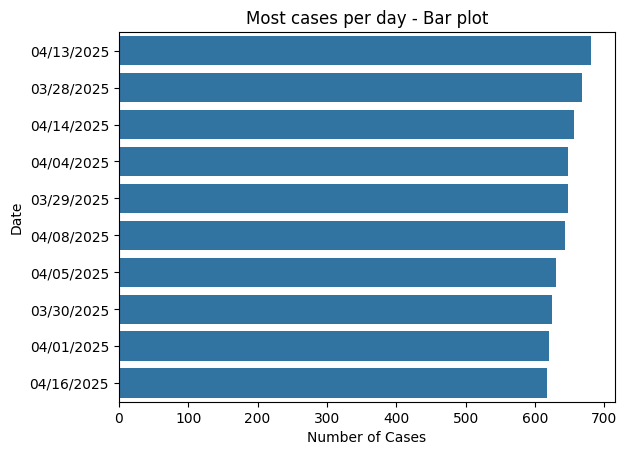

In [ ]:
top_10_num_of_cases_each_day_df = pd.DataFrame(top_10_num_of_cases_each_day)
index_df = top_10_num_of_cases_each_day_df.index

sns.barplot(x = index_df , y = 'date' , data = top_10_num_of_cases_each_day_df)
plt.title("Most cases per day - Bar plot")
plt.xlabel("Number of Cases")
plt.ylabel("Date")
plt.show()

#### Observation
<b>
    <i>
        1. The average Number of cases per day could be more than 800.
    </i>
</b>

In [ ]:
# Most appeared block address ?

df.groupby(['Block' , 'Case Number'])['Block'].count().reset_index(name = 'Number of times the address appears').set_index('Number of times the address appears').sort_index(ascending = False)[:10]

,Block,Case Number
Number of times the address appears,,
1,0000X E 100TH PL,JJ199600
1,0000X E 100TH ST,JJ212443
1,0000X E 101ST PL,JJ198903
1,0000X E 101ST ST,JJ218952
1,0000X E 103RD PL,JJ198454
1,0000X E 104TH ST,JJ200892
1,0000X E 104TH ST,JJ206179
1,0000X E 108TH ST,JJ200809
1,0000X E 113TH PL,JJ217758


In [ ]:
no_of_address_appears = df.groupby(['Block' , 'Case Number'])['Block'].count().reset_index(name = 'Number of times the address appears').set_index('Number of times the address appears').sort_index(ascending = False)[:10].index
block_address = df.groupby(['Block' , 'Case Number'])['Block'].count().reset_index(name = 'Number of times the address appears').set_index('Number of times the address appears').sort_index(ascending = False)['Block'].values[:10]

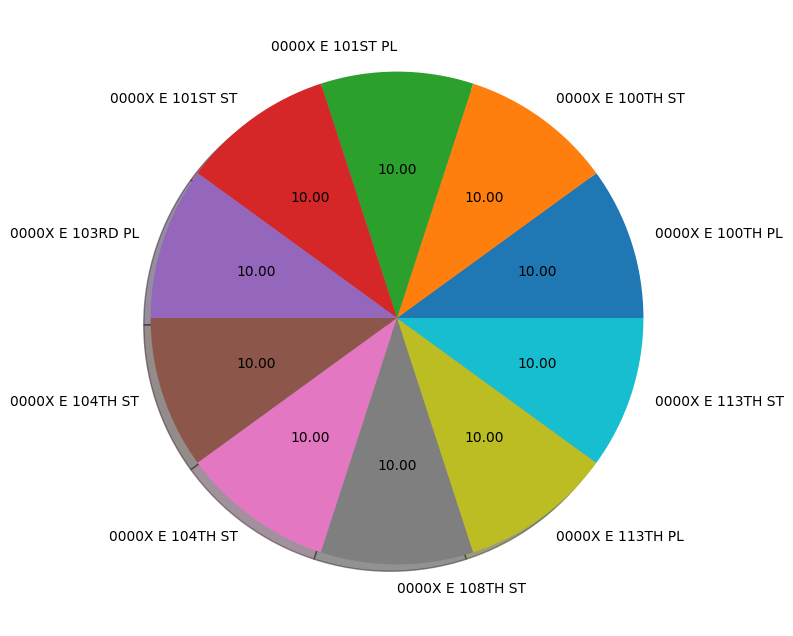

In [ ]:
plt.figure(figsize = (10,8))
plt.pie(no_of_address_appears , labels = block_address , autopct = '%0.2f' , shadow = True)
plt.show()

In [ ]:
df['Primary Type'].value_counts()[:10]

,count
Primary Type,
THEFT,2938
BATTERY,2382
CRIMINAL DAMAGE,1623
ASSAULT,1254
OTHER OFFENSE,977
MOTOR VEHICLE THEFT,853
DECEPTIVE PRACTICE,706
NARCOTICS,488
BURGLARY,411


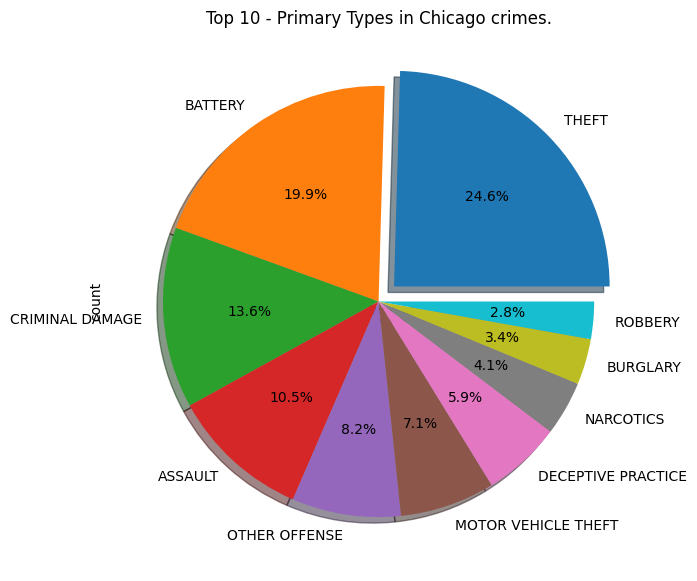

In [ ]:
top_10_primary_types = df['Primary Type'].value_counts()[:10].plot(kind = 'pie' , autopct = "%1.1f%%" ,  shadow = True , explode = [0.1,0,0,0,0,0,0,0,0,0])
plt.title("Top 10 - Primary Types in Chicago crimes.")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

##### Observation:

<b>
    <i>
       1. "Theft" with 228366 followed by "Battery" with 182834 and "Criminal Damage" with 117637 are the most common types of crimes over the years. <br>
       2. 062XX S MORGAN ST is the most commonly appeared address for crimes with 5 times to be exact. <br>        
    </i>
        
    
</b>

In [ ]:
# Out of total case registered how many are arrested and how many are not?

arrested = df['Arrest'].where(df['Arrest'] == True).count()
not_arrested = df['Arrest'].where(df['Arrest'] != True).count()

print(f"Out of {len(df)},\n{arrested} are Arrested and \n{not_arrested} are not Arrested.")


Out of 13088,
2100 are Arrested and 
10987 are not Arrested.


<b> Out of total cases , 13 % of Criminals are arrested .

<ipython-input-21-61b1a948e9b6>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime_count = df.resample("M"  , on = 'date').size()


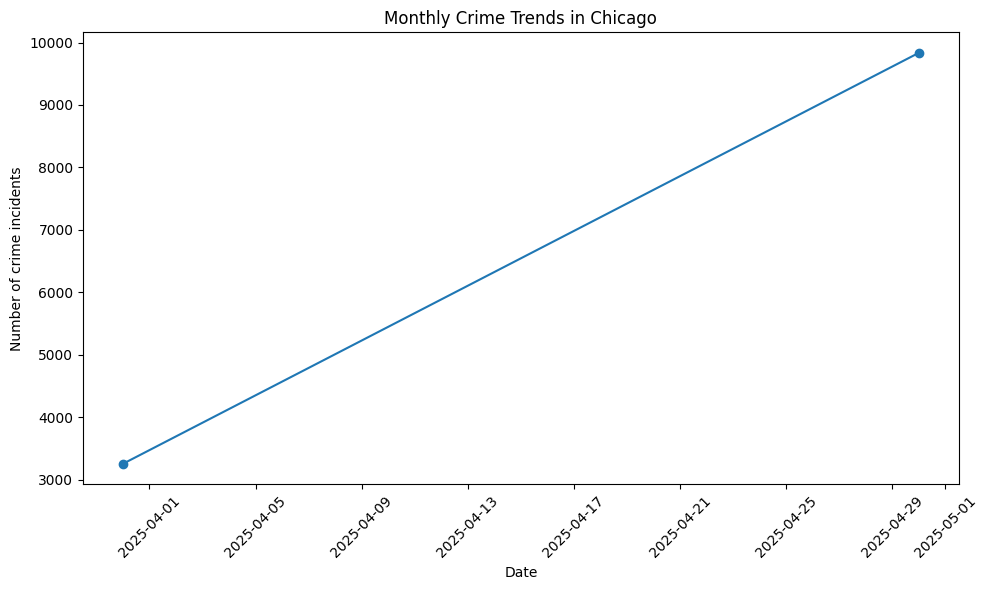

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert date to DateTime64 [ns].

monthly_crime_count = df.resample("M"  , on = 'date').size()

# Create a line plot.

plt.figure(figsize = (10,6))
plt.plot(monthly_crime_count.index , monthly_crime_count.values , marker = 'o')
plt.xlabel("Date")
plt.ylabel("Number of crime incidents")
plt.title("Monthly Crime Trends in Chicago")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


##### Observation :

<b> <i>
    1.The crime rate is dropping overall. <br>
    2.In early 2021,number of crime incidents were close to 16k. <br>
    3.In 2025 ,it's estimate to be less than 10k , so it's a major drop in crime. <br>
    </i>
</b>

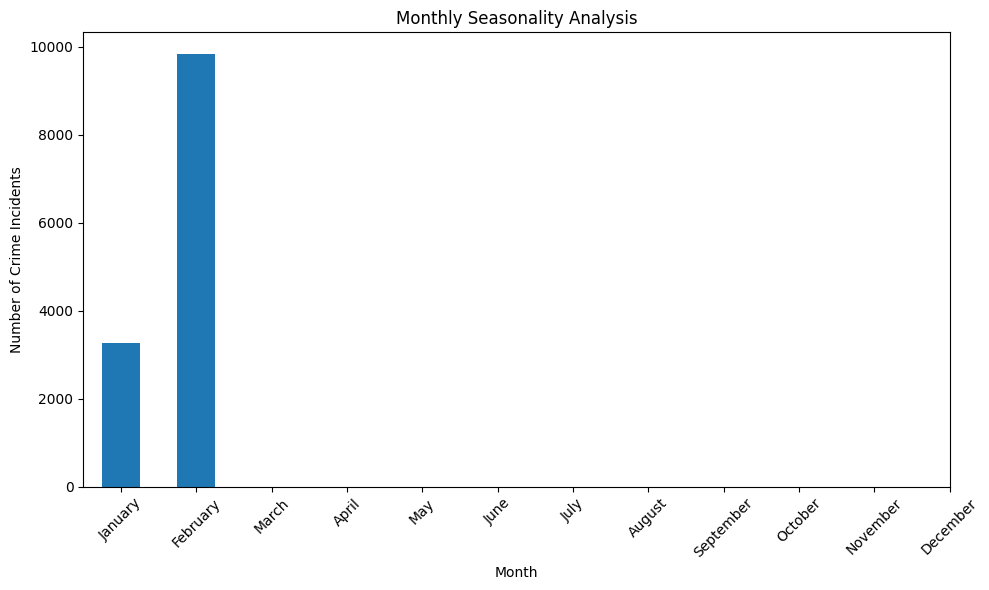

In [ ]:
# Extract month and year from 'date' col.
df['month'] = df['date'].dt.month

# group data by month and count incidents
monthly_crime_count = df.groupby('month').size()

# Define months

month_names = [
    'January','February','March','April','May','June','July','August','September','October',
    'November','December']


# Bar plot - seasonality analysis

plt.figure(figsize = (10,6))
monthly_crime_count.plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Number of Crime Incidents")
plt.title("Monthly Seasonality Analysis")
plt.xticks(range(12) , month_names , rotation = 45)
plt.tight_layout()
plt.show()

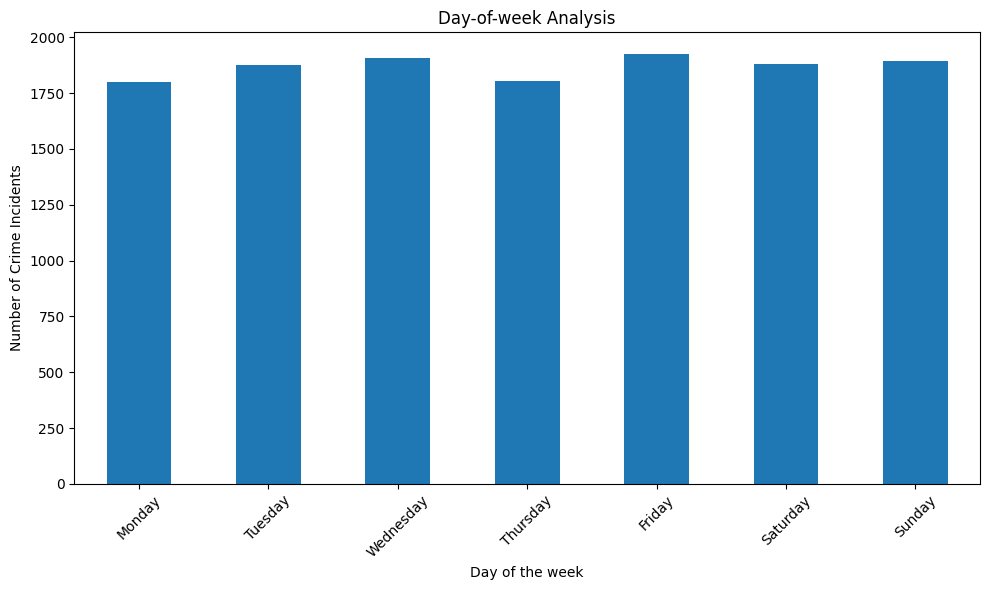

In [ ]:
# Day of week analysis

# Extract day of the week from 'date' column (0 = Monday , 6 = Sunday)
df['DayofWeek'] = df['date'].dt.dayofweek

# Group data by day of the week and count incidents
day_of_week_crime_count = df.groupby('DayofWeek').size()

# Define day names for labeling
day_names = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday', 'Sunday']

# Bar plot - day of the week .

plt.figure(figsize = (10,6))
day_of_week_crime_count.plot(kind = "bar")
plt.xlabel("Day of the week")
plt.ylabel("Number of Crime Incidents")
plt.title("Day-of-week Analysis")
plt.xticks(range(7) , day_names , rotation = 45)
plt.tight_layout()
plt.show()

##### Observation :

<b>
    <i>
        1. January , March , July are the months with most crime activities.<br>
        2. Whereas Monday , Friday and Saturday can be said as most crime days in a week. <br></i>
    
</b>

In [ ]:
import folium
from folium.plugins import HeatMap
# Only plotting first 1000 points for speed
sample = df[['Latitude', 'Longitude']].dropna().sample(1000)

map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
for idx, row in sample.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=1,
                        color='red').add_to(map_chicago)

map_chicago


# **DATA CLEANING**

In [ ]:
# Handle missing values
df_2021_clean = df.dropna(subset=['Primary Type', 'date', 'Location Description', 'Latitude', 'Longitude'])

# Remove duplicates
df_2021_clean = df_2021_clean.drop_duplicates()


In [ ]:
# Address inconsistencies: strip and standardize text columns
# Using actual column names:
df_2021_clean['Primary Type'] = df_2021_clean['Primary Type'].str.strip().str.upper()
df_2021_clean['Location Description'] = df_2021_clean['Location Description'].str.strip().str.upper()

# Rename columns for consistency if necessary:
df_2021_clean = df_2021_clean.rename(columns={
    'Primary Type': 'primary_type',
    'Location Description': 'location_description',
    'Latitude': 'latitude',
    'Longitude': 'longitude'
})

In [ ]:
# Remove outliers: latitude and longitude outside expected ranges
# Chicago approximate lat/lon: 41.64 - 42.02, -87.94 - -87.52
df_2021_clean = df_2021_clean[
    (df_2021_clean['latitude'] >= 41.64) & (df_2021_clean['latitude'] <= 42.02) &
    (df_2021_clean['longitude'] >= -87.94) & (df_2021_clean['longitude'] <= -87.52)
]

print(f"Records after cleaning: {df_2021_clean.shape}")

Records after cleaning: (12963, 25)


In [ ]:
# Post-cleaning Analysis

# Distribution of Primary Crime Types
crime_type_counts = df_2021_clean['primary_type'].value_counts()

# Crimes by Year/Month/Day
df_2021_clean['year'] = df_2021_clean['date'].dt.year
df_2021_clean['month'] = df_2021_clean['date'].dt.month
df_2021_clean['day_of_week'] = df_2021_clean['date'].dt.day_name()
df_2021_clean['hour'] = df_2021_clean['date'].dt.hour

crime_by_month = df_2021_clean.groupby(['year', 'month']).size()

# Top Crime Locations
top_locations = df_2021_clean['Block'].value_counts().head(10)

# Print summaries
print("Top Crime Types after cleaning:")
print(crime_type_counts.head(10))


Top Crime Types after cleaning:
primary_type
THEFT                  2912
BATTERY                2372
CRIMINAL DAMAGE        1622
ASSAULT                1248
OTHER OFFENSE           971
MOTOR VEHICLE THEFT     846
DECEPTIVE PRACTICE      647
NARCOTICS               488
BURGLARY                409
ROBBERY                 334
Name: count, dtype: int64


In [ ]:
df_2021_clean.isnull().sum() # Get the number of null values in each column.

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
primary_type,0
Description,0
location_description,0
Arrest,0
Domestic,0


In [ ]:
df_2021_clean.isnull().mean() *100

,0
ID,0.0
Case Number,0.0
Date,0.0
Block,0.0
IUCR,0.0
primary_type,0.0
Description,0.0
location_description,0.0
Arrest,0.0
Domestic,0.0


<ipython-input-31-02a0552451d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.head(10).values, y=crime_type_counts.head(10).index, palette='magma')


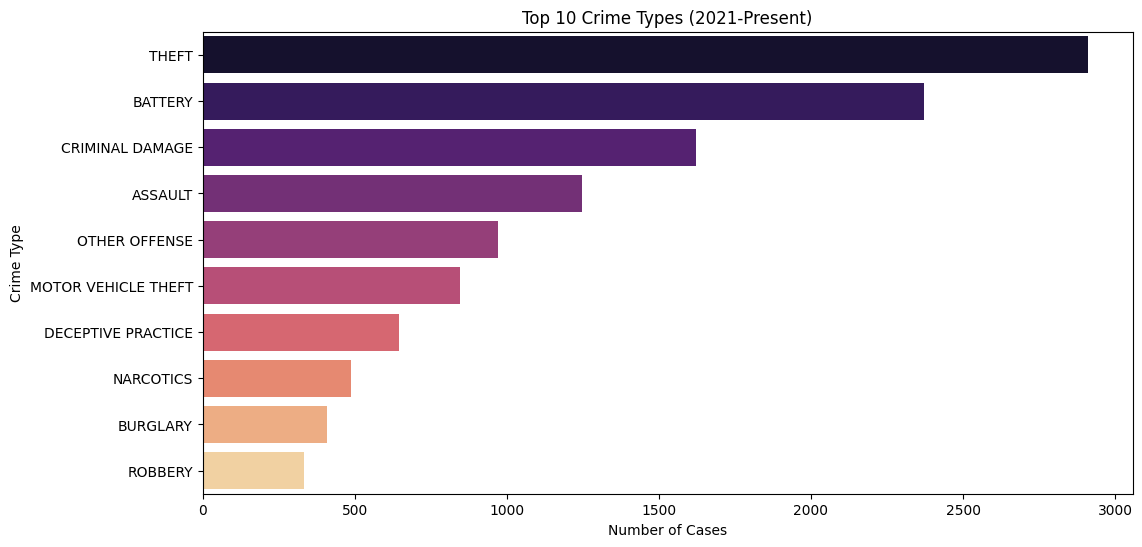

In [ ]:
# 7. Visualization

# Top 10 Crime Types
plt.figure(figsize=(12,6))
sns.barplot(x=crime_type_counts.head(10).values, y=crime_type_counts.head(10).index, palette='magma')
plt.title('Top 10 Crime Types (2021-Present)')
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.show()


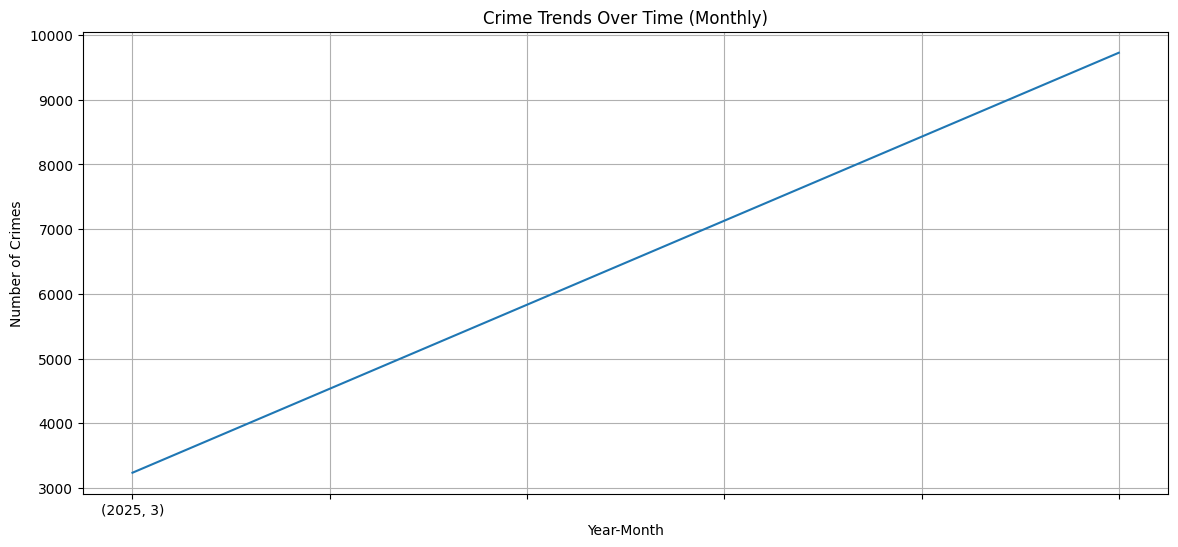

In [ ]:
# Crimes Over Time
crime_by_month.plot(kind='line', figsize=(14,6))
plt.title('Crime Trends Over Time (Monthly)')
plt.ylabel('Number of Crimes')
plt.xlabel('Year-Month')
plt.grid(True)
plt.show()


In [ ]:
# Crime Locations (Map Heatmap)
heat_data = df_2021_clean[['latitude', 'longitude']].dropna().values.tolist()

heat_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(heat_data[:10000]).add_to(heat_map)  # Plotting top 10k points for performance
heat_map
